<h1>PS_1 ML HACKATHON </h1>

In [1]:
%pip install seaborn

import copy, math
import numpy as np;
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
df = pd.read_csv('PS1/data.csv')

y_train = df[df.columns[1]]

value_counts = y_train.value_counts()

print(value_counts)

B    357
M    212
Name: diagnosis, dtype: int64


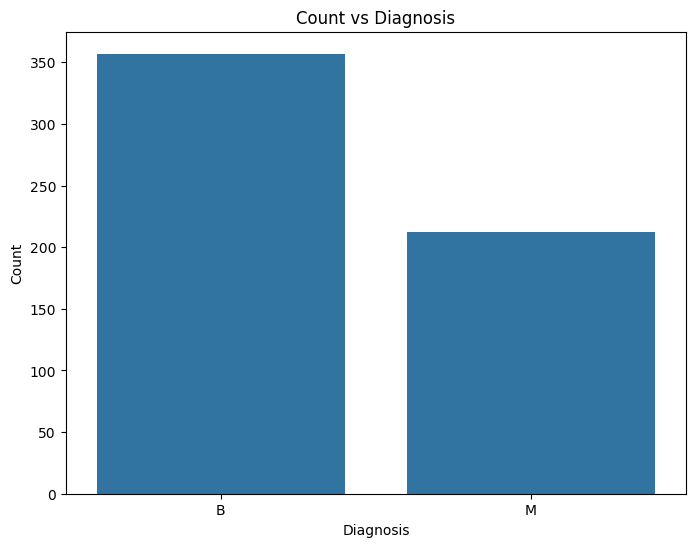

In [10]:
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.ylabel('Count')
plt.xlabel('Diagnosis')
plt.title('Count vs Diagnosis')
plt.show()

In [11]:
y_train = y_train.map({'M': 1, 'B': 0})
print(y_train)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [12]:

X = df.iloc[:, 2:-1].values
print(X.shape)
X

(569, 30)


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

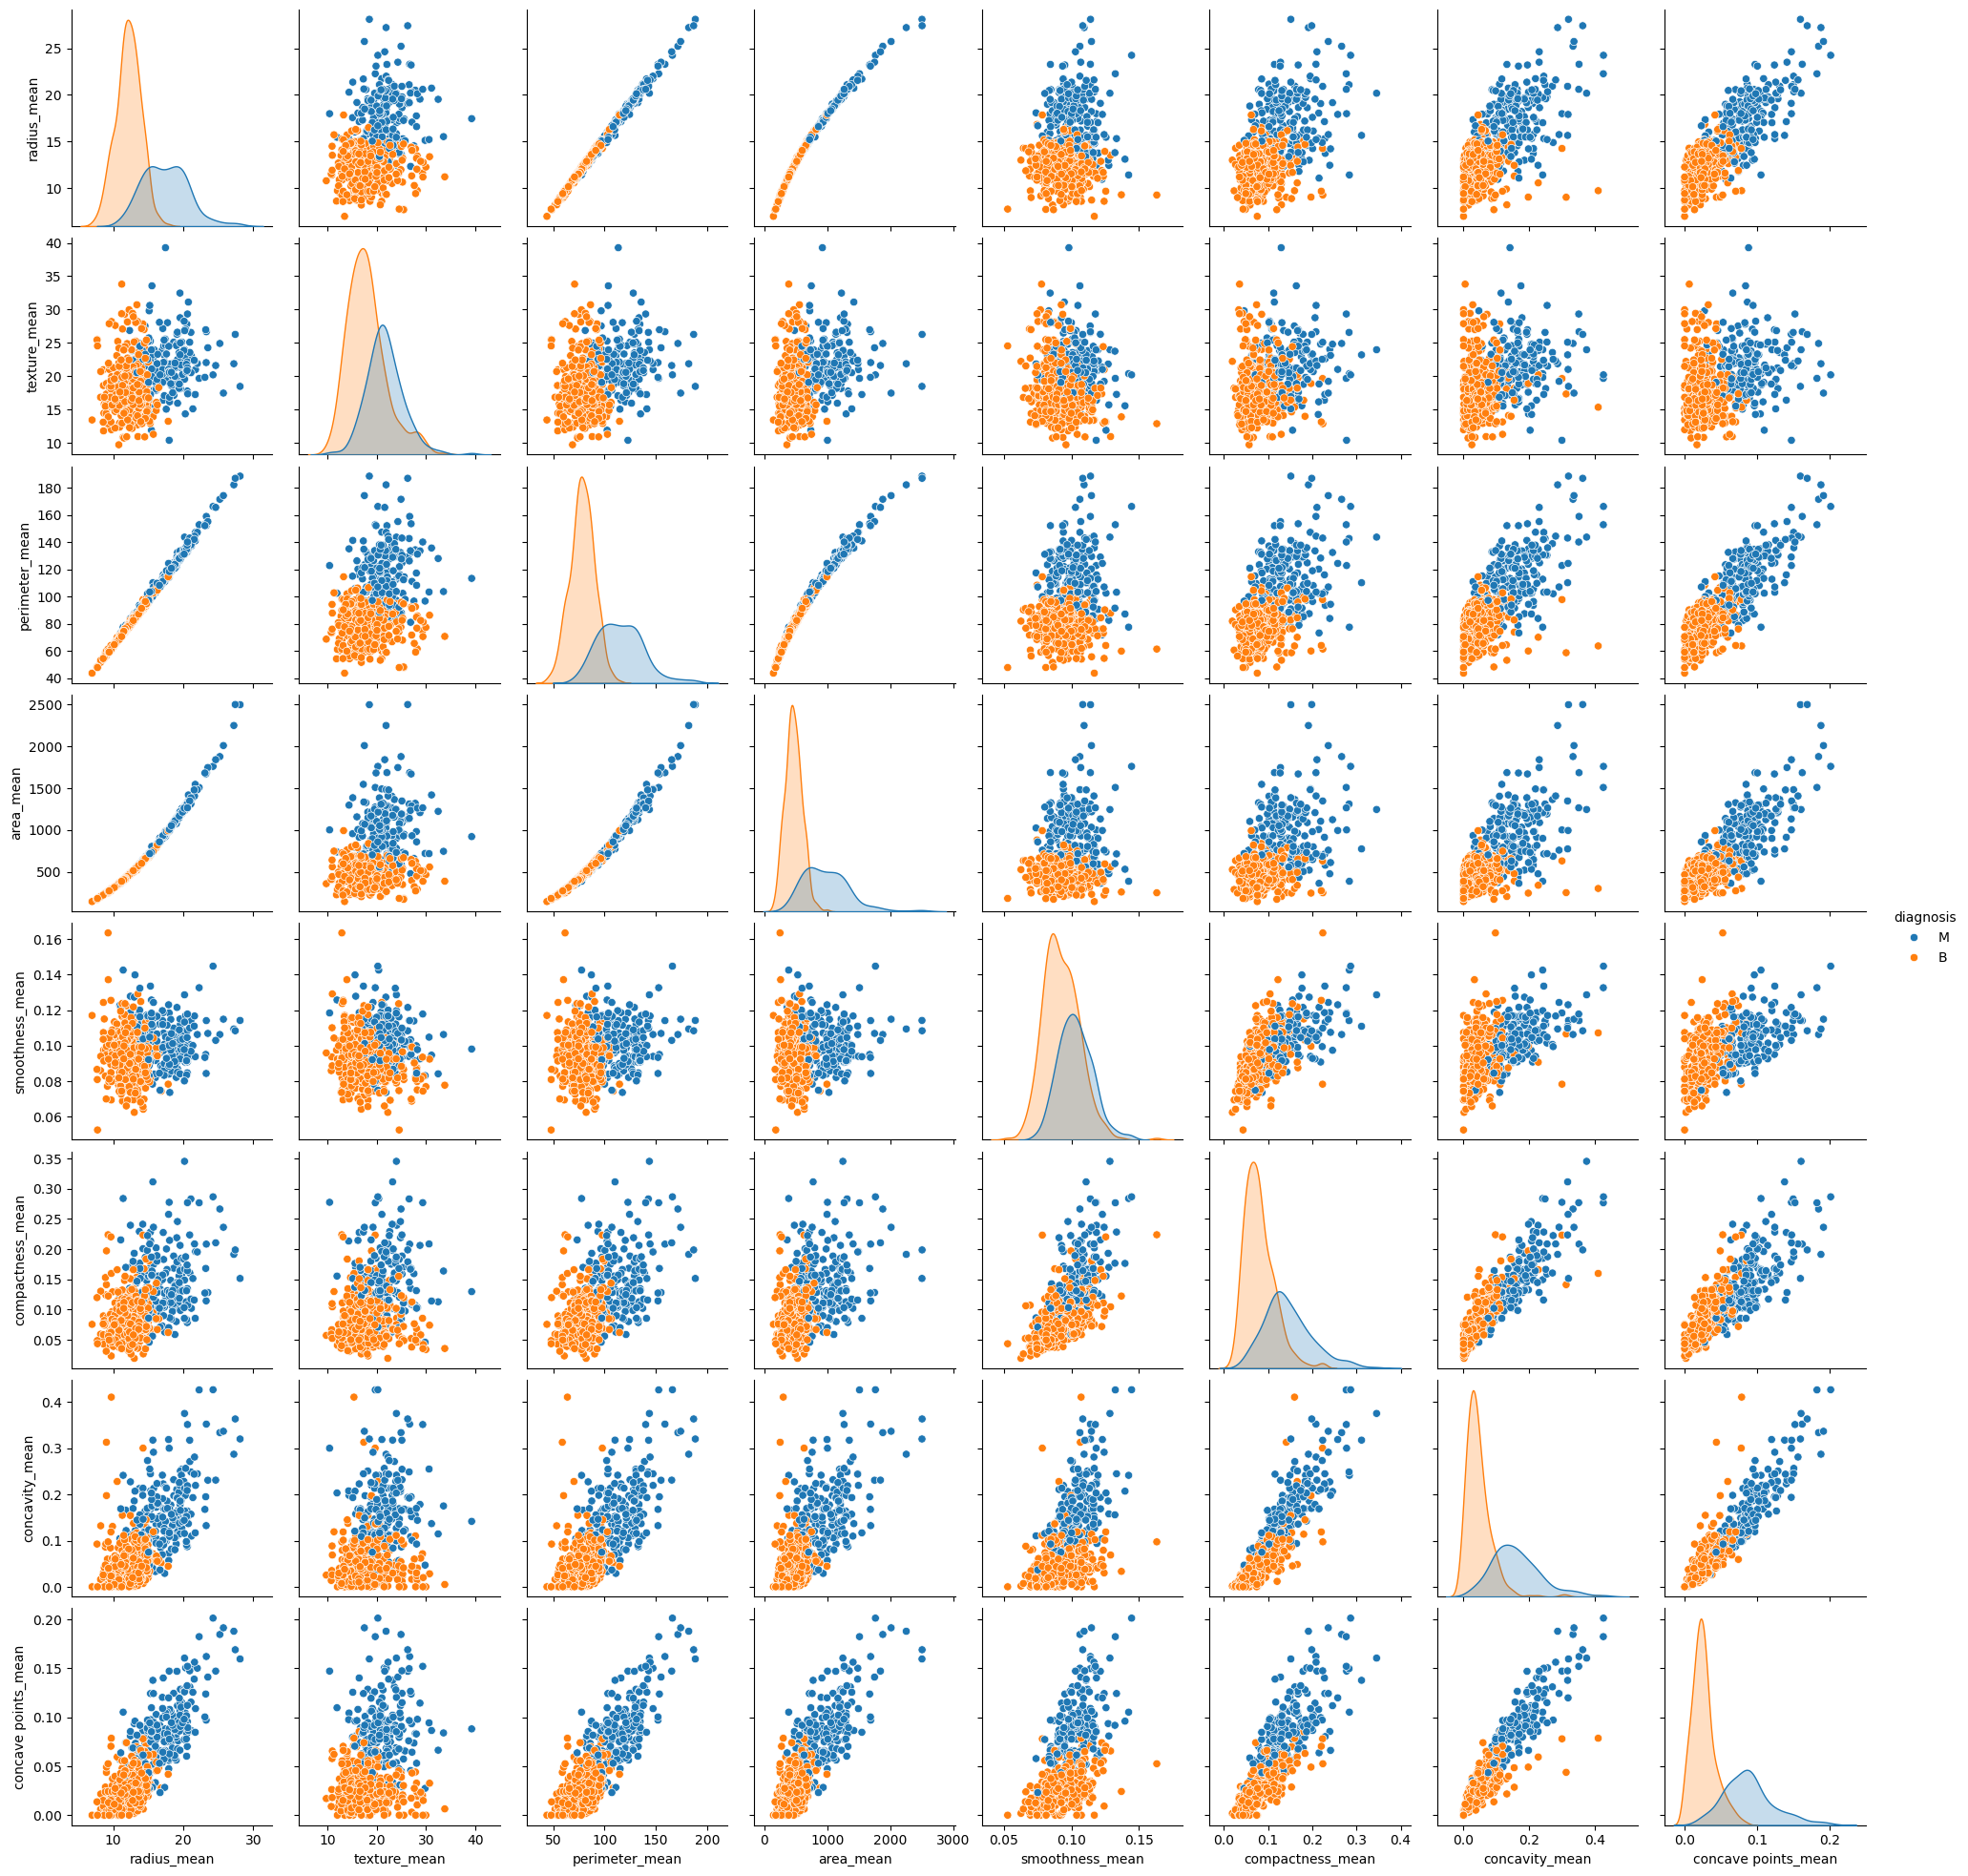

In [6]:
sns.pairplot(df.iloc[:,1:10],hue='diagnosis')

<h1>Normalisation</h1>

In [7]:
def zscore_normalize(X):
    mu=np.mean(X,axis=0)
    sig=np.std(X,axis=0)
    X_norm=(X-mu)/sig
    return X_norm

In [8]:
X_train_array=zscore_normalize(X)
X_train_array

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [10]:
def compute_cost(X, y, w, b, lambda_ = 1):
    m, n = X.shape
    l_x = 0 

    for i in range(m):
        z = 0
        for j in range(n):
            zz = w[j] * X[i][j]
            z += zz
        z += b
        fx = sigmoid(z)
        l_x += (-y[i] * np.log(fx) - (1 - y[i]) * np.log(1 - fx))

    total_cost = l_x / m 
    cost_without_reg = total_cost
    
    reg_cost = 0.
   
    for i in range(n):
        reg_cost += w[i]**2
    reg_cost = (lambda_*reg_cost)/(2*m)
    total_cost = cost_without_reg + reg_cost

    return total_cost

In [11]:
def compute_gradient(X, Y, w, b, lambda_ = 1): 
    
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)
        err_i = f_wb_i - Y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i, j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    dj=0
    for i in range(n):
        dj_dw[i] += lambda_*w[i]/m
        
    return dj_db, dj_dw

In [12]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    m = len(X)
    iters_hist = []
    J_history = []
    w_history = []
    b_history = []
    for i in range(num_iters):

        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        if i<100000:   
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            

        if i% math.ceil(num_iters/40) == 0 or i == (num_iters):
            iters_hist.append(i)
            J_history.append(cost)
            w_history.append(w_in)
            b_history.append(b_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.5f}   ")
        
    return w_in, b_in, J_history, w_history ,b_history,iters_hist

<h1>TRAINING THE MODEL</h1>

In [13]:
w_tmp  = np.zeros_like(X_train_array[0])

b_tmp  = 0.0
alpha = 0.01
iters = 4000
lambda_ = 0.3
w,b, J_history, w_history ,b_history,iterators_hist = gradient_descent(X_train_array, y_train, w_tmp, b_tmp, 
                                    compute_cost, compute_gradient, 
                                    alpha, iters, lambda_) 
print(f"\nupdated parameters: w:{w}, b:{b}")
print(f"\nfinal cost = :{compute_cost(X_train_array,y_train,w,b)}")

Iteration    0: Cost  0.67336   
Iteration  100: Cost  0.24802   
Iteration  200: Cost  0.18641   
Iteration  300: Cost  0.15844   
Iteration  400: Cost  0.14188   
Iteration  500: Cost  0.13073   
Iteration  600: Cost  0.12261   
Iteration  700: Cost  0.11637   
Iteration  800: Cost  0.11141   
Iteration  900: Cost  0.10733   
Iteration 1000: Cost  0.10391   
Iteration 1100: Cost  0.10100   
Iteration 1200: Cost  0.09847   
Iteration 1300: Cost  0.09626   
Iteration 1400: Cost  0.09430   
Iteration 1500: Cost  0.09255   
Iteration 1600: Cost  0.09097   
Iteration 1700: Cost  0.08955   
Iteration 1800: Cost  0.08825   
Iteration 1900: Cost  0.08706   
Iteration 2000: Cost  0.08596   
Iteration 2100: Cost  0.08495   
Iteration 2200: Cost  0.08401   
Iteration 2300: Cost  0.08313   
Iteration 2400: Cost  0.08232   
Iteration 2500: Cost  0.08155   
Iteration 2600: Cost  0.08084   
Iteration 2700: Cost  0.08016   
Iteration 2800: Cost  0.07952   
Iteration 2900: Cost  0.07892   
Iteration 

##### 

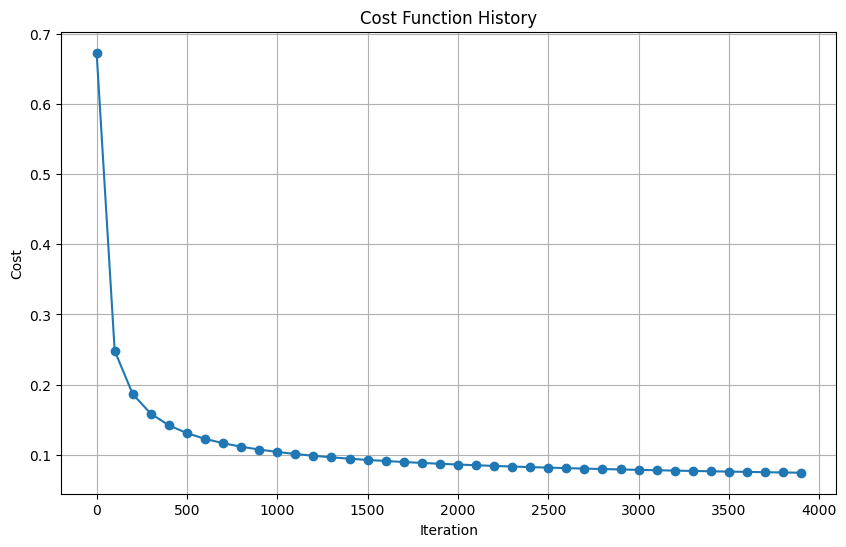

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(iterators_hist, J_history, marker='o', linestyle='-')
plt.title('Cost Function History')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [15]:

def predict(X, w, b): 
    m, n = X.shape   
    p = np.zeros(m)
   
    for i in range(m):   
        z_wb = 0
        for j in range(n): 
            z_wb += w[j]*X[i][j]
        
        z_wb += b
        
        f_wb = sigmoid(z_wb)

        p[i] = f_wb >=0.5
        
    return p

<h2>Accuracy</h1>

In [17]:
p = predict(X_train_array, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 98.594025


In [18]:
dict={}
dict={'NO OF ITERATIONS': iterators_hist,'COST':J_history, 'BIAS HISTORY':b_history,'WEIGHT_HISTORY':w_history}
data = pd.DataFrame(dict)
data.to_csv('history.csv')

history = pd.read_csv('history.csv')
history

,Unnamed: 0,NO OF ITERATIONS,COST,BIAS HISTORY,WEIGHT_HISTORY
0,0,0,0.673359,-0.001274,[ 3.52963335e-03 2.00738993e-03 3.59058734e-...
1,1,100,0.248025,-0.096778,[ 0.1572487 0.10155249 0.15813913 0.151150...
2,2,200,0.186410,-0.153390,[ 0.21958675 0.1516118 0.21984595 0.211873...
3,3,300,0.158438,-0.193647,[ 0.25959953 0.18860051 0.25920572 0.251474...
4,4,400,0.141878,-0.224706,[ 0.28887997 0.21870184 0.2878868 0.280847...
5,5,500,0.130727,-0.249800,[ 0.31183787 0.24434077 0.31029502 0.304143...
6,6,600,0.122607,-0.270695,[ 0.33064191 0.266772 0.32858967 0.323410...
7,7,700,0.116374,-0.288473,[ 0.34651482 0.28674498 0.34398635 0.339813...
8,8,800,0.111405,-0.303842,[ 0.36021115 0.30475091 0.35723461 0.354072...
9,9,900,0.107330,-0.317297,[ 0.37222812 0.32113371 0.36882807 0.366667...
